# GRIP - Data Science and Business Analytics Internship

## TASK 6

## Prediction using Decision Tree Algorithm
### Create the Decision Tree classifier and visualize it graphically on the given dataset

### Author: Krithika S

### Importing the necssary libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report


### Reading the data

In [239]:
df = pd.read_csv('Iris.csv')
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [240]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Exploratory Data Analysis

In [241]:
df.drop(['Id'],axis=1,inplace=True)
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [242]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [243]:
print(df.isnull().sum())


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


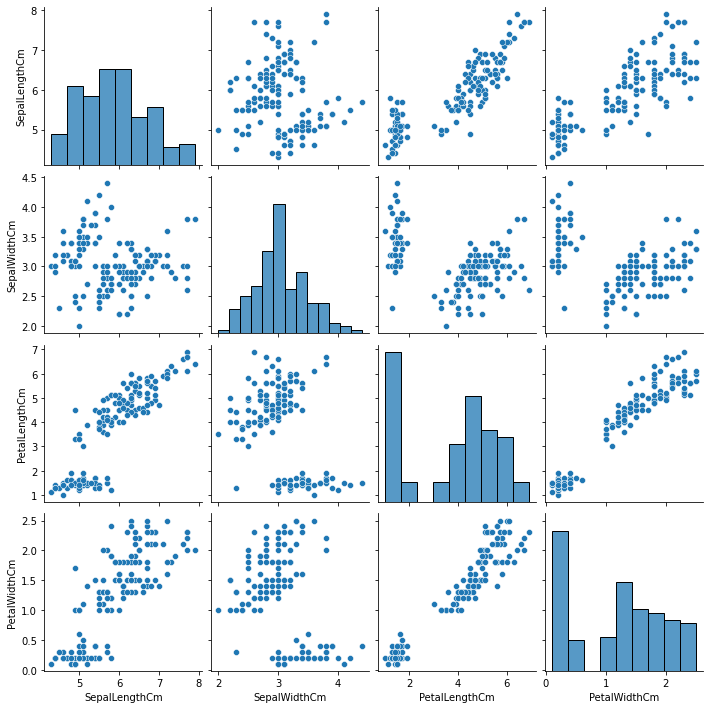

In [244]:
sns.pairplot(df.iloc[:,:-1])

### Preparing data for training

In [253]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

features = list(df.columns.values)[:-1]
print("Features:",features)
labels = np.unique(df.iloc[:,-1].values)
print("Target classes:",labels)
                
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Training

In [246]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction

In [247]:
y_pred = clf_dt.predict(X_test)

### Evaluating the model

Accuracy score:
 0.9666666666666667
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]


<AxesSubplot:>

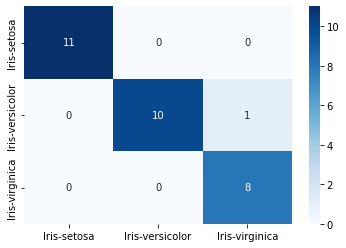

In [250]:
print("Accuracy score:\n",accuracy_score(y_test,y_pred))

print("Classification report:\n",classification_report(y_test,y_pred))

cfn_mtx = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cfn_mtx)
sns.heatmap(cfn_mtx,annot=cfn_mtx,xticklabels=labels, yticklabels=labels,cmap='Blues')



### Visualization of the trained model

[Text(334.8, 757.1571428571428, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]\nclass = Iris-virginica'),
 Text(251.10000000000002, 640.6714285714286, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 640.6714285714286, 'PetalLengthCm <= 4.85\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]\nclass = Iris-virginica'),
 Text(167.4, 524.1857142857143, 'PetalWidthCm <= 1.65\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]\nclass = Iris-versicolor'),
 Text(83.7, 407.7, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 407.7, 'SepalWidthCm <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(167.4, 291.21428571428567, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(334.8, 291.21428571428567, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(669.6, 524.1857142857143, 'PetalWidthCm <= 1.7\ngini = 0.0

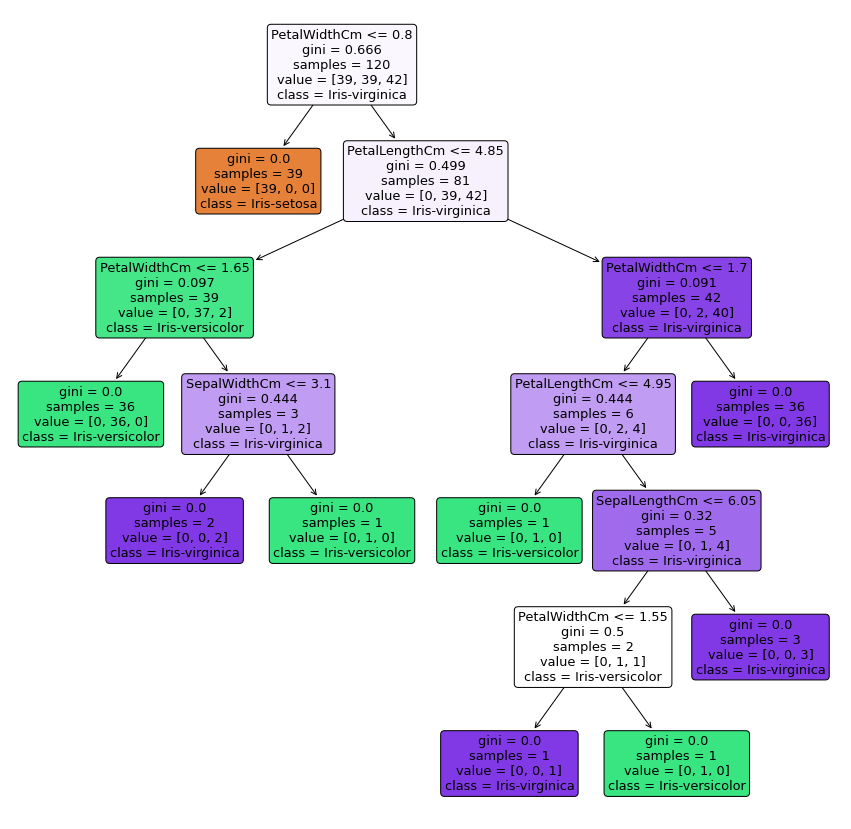

In [251]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf_dt,feature_names=features,class_names=labels,filled=True, rounded=True)